In [1]:
import numpy as np

# Constants
h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
phi_0 = 2.067833831e-15  # Magnetic flux quantum in Wb
e = 1.60217662e-19  # Elementary charge in C
Zr = 50  # Ohm, characteristic impedance of the resonator

# Given parameters (replace these with actual values)
omega_q = 5.0e9 * 2 * np.pi  # Angular frequency of qubit in rad/s
omega_r = 6.5e9 * 2 * np.pi  # Angular frequency of resonator in rad/s
Qext = 4000 # External quality factor of the resonator
EJ_EC_ratio = 50  # EJ/EC ratio
Delta = omega_r - omega_q  # Detuning in rad/s (example value)

# Derived parameters
Ec = h_bar * omega_q / (np.sqrt(8 * EJ_EC_ratio) - 1)  # Charging energy in J
Cq = e**2 / (2 * Ec)  # Qubit capacitance in F
Ej = EJ_EC_ratio * Ec  # Josephson energy in J
Ic =  Ej * 4 * e * np.pi/h_bar/2/np.pi  # Critical current in A
alpha = Ec/h_bar

# Convert Ec, Ej to MHz and Ic to nA
Ec_MHz = Ec / h_bar / (2 * np.pi) * 1e-6
Ej_MHz = Ej / h_bar / (2 * np.pi) * 1e-6
Ic_nA = Ic * 1e9

# Calculate resonator capacitance Cr in F
Cr = np.pi / 4/(omega_r * Zr)

# Calculate kappa
kappa = omega_r / Qext

# Calculate kappa_i
# dispersive shift
kai = kappa / 2


# Calculate coupling strength g in MHz
g = np.sqrt(kai * Delta * ((alpha + Delta) / alpha)) 

# Calculate T1 Purcell limit in us
T1_purcell_limit = 2 * alpha / kappa**2 *(2 * np.pi) * 1e6

# Output results
print(f"Cq (Qubit capacitance): {Cq * 1e15:.2f} fF")
print(f"Ic (Critical current): {Ic_nA:.2f} nA")
print(f"Ej (Josephson energy): {Ej_MHz:.2f} MHz")
print(f"Ec (Charging energy): {Ec_MHz:.2f} MHz")
print(f"Cr (Resonator capacitance): {Cr * 1e15:.2f} fF")
print(f"kappa (Decay rate): {kappa:.2e} Hz")
print(f"1/kappa (Decay time): {1/kappa*1e9:.2e} ns")
print(f"Dispersive shift: {kai*1e-6 /2 / np.pi:.2e} MHz")
print(f"g (Coupling strength): {g/ (2 * np.pi) * 1e-6:.2f} MHz")
print(f"T1 Purcell limit: {T1_purcell_limit:.2f} μs")



Cq (Qubit capacitance): 73.61 fF
Ic (Critical current): 26.49 nA
Ej (Josephson energy): 13157.89 MHz
Ec (Charging energy): 263.16 MHz
Cr (Resonator capacitance): 384.62 fF
kappa (Decay rate): 1.02e+07 Hz
1/kappa (Decay time): 9.79e+01 ns
Dispersive shift: 8.12e-01 MHz
g (Coupling strength): 90.36 MHz
T1 Purcell limit: 199.31 μs


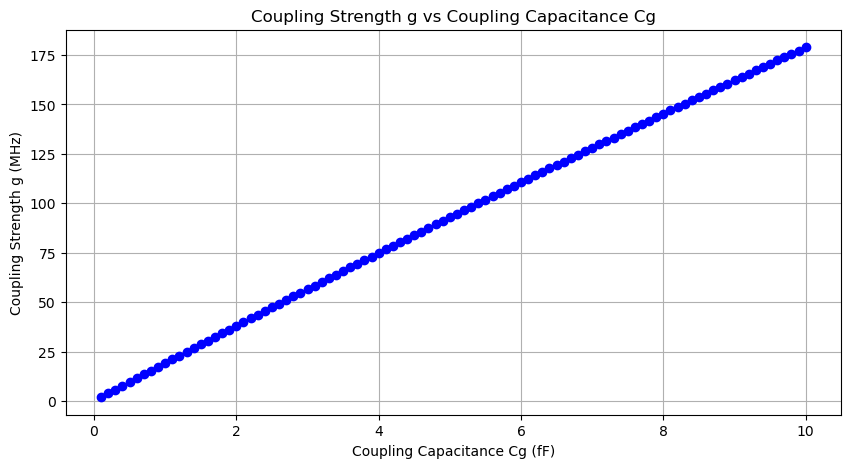

Optimal Cg: 4.90 fF
Resulting g closest to 90.36384785963911 MHz: 91.07 MHz
Kai: 0.97 MHz


In [2]:
import matplotlib.pyplot as plt


# Define the function to calculate g
def coupling_strength(Cg, Cq, Cr, omega_r):
    g= 1/2  * omega_r *Cg/np.sqrt((Cq+Cg)*(Cg+Cr))
    return g

# Define the objective function to minimize the difference from the desired g
def objective(Cg):
    return (coupling_strength(Cg[0], Cq, Cr, omega_r) - g)**2
    
Cg_values = np.linspace(0.1e-15, 10e-15, 100)  # From 0.1 fF to 10 fF

# Store g values for each Cg
g_values = np.array([coupling_strength(Cg, Cq, Cr, omega_r) for Cg in Cg_values])

# Convert g to MHz for plotting
g_values_MHz = g_values / (2 * np.pi) * 1e-6

# Plot g vs Cg
plt.figure(figsize=(10, 5))
plt.plot(Cg_values * 1e15, g_values_MHz, marker='o', linestyle='-', color='b')
plt.title('Coupling Strength g vs Coupling Capacitance Cg')
plt.xlabel('Coupling Capacitance Cg (fF)')
plt.ylabel('Coupling Strength g (MHz)')
plt.grid(True)
plt.show()

# Find the Cg value that gives the closest g to the desired value
desired_g_MHz = g/2/np.pi/1e6  # Desired g in MHz, example
index = np.argmin(np.abs(g_values_MHz - desired_g_MHz))
optimal_Cg = Cg_values[index]
optimal_g = g_values_MHz[index]
kai = optimal_g**2*1e12/Delta**2*alpha*2*np.pi *1e-6


print(f"Optimal Cg: {optimal_Cg*1e15:.2f} fF")
print(f"Resulting g closest to {desired_g_MHz} MHz: {optimal_g:.2f} MHz")
print(f"Kai: {kai:.2f} MHz")

In [3]:
import numpy as np

# Constants
h_bar = 1.0545718e-34  # Planck constant over 2pi in Js
phi_0 = 2.067833831e-15  # Magnetic flux quantum in Wb
e = 1.60217662e-19  # Elementary charge in C
Zr = 50  # Ohm, characteristic impedance of the resonator

# Given parameters (replace these with actual values)
omega_q = 5.0e9 * 2 * np.pi  # Angular frequency of qubit in rad/s
omega_r = 3.5e9 * 2 * np.pi  # Angular frequency of resonator in rad/s
Qext = 1e6 # External quality factor of the resonator
EJ_EC_ratio = 50  # EJ/EC ratio
Delta = np.abs(omega_r - omega_q)  # Detuning in rad/s (example value)

# Derived parameters
Ec = h_bar * omega_q / (np.sqrt(8 * EJ_EC_ratio) - 1)  # Charging energy in J
Cq = e**2 / (2 * Ec)  # Qubit capacitance in F
Ej = EJ_EC_ratio * Ec  # Josephson energy in J
Ic =  Ej * 4 * e * np.pi/h_bar/2/np.pi  # Critical current in A
alpha = Ec/h_bar

# Convert Ec, Ej to MHz and Ic to nA
Ec_MHz = Ec / h_bar / (2 * np.pi) * 1e-6
Ej_MHz = Ej / h_bar / (2 * np.pi) * 1e-6
Ic_nA = Ic * 1e9

# Calculate resonator capacitance Cr in F
Cr = np.pi / 4/(omega_r * Zr)

# Calculate kappa
kappa = omega_r / Qext

# Calculate kappa_i
kai = kappa / 2


# Calculate coupling strength g in MHz
g = np.sqrt(kai * Delta * ((alpha + Delta) / alpha)) 

# Calculate T1 Purcell limit in us
T1_purcell_limit = 2 * alpha / kappa**2 *(2 * np.pi) * 1e6

# Output results
print(f"Cq (Qubit capacitance): {Cq * 1e15:.2f} fF")
print(f"Ic (Critical current): {Ic_nA:.2f} nA")
print(f"Ej (Josephson energy): {Ej_MHz:.2f} MHz")
print(f"Ec (Charging energy): {Ec_MHz:.2f} MHz")
print(f"Cr (Resonator capacitance): {Cr * 1e15:.2f} fF")
print(f"kappa (Decay rate): {kappa:.2e} Hz")
print(f"1/kappa (Decay time): {1/kappa*1e9:.2e} ns")
print(f"Dispersive shift: {kai*1e-6 /2 / np.pi:.2e} MHz")
print(f"g (Coupling strength): {g/ (2 * np.pi) * 1e-6:.2f} MHz")
print(f"T1 Purcell limit: {T1_purcell_limit:.2f} μs")



Cq (Qubit capacitance): 73.61 fF
Ic (Critical current): 26.49 nA
Ej (Josephson energy): 13157.89 MHz
Ec (Charging energy): 263.16 MHz
Cr (Resonator capacitance): 714.29 fF
kappa (Decay rate): 2.20e+04 Hz
1/kappa (Decay time): 4.55e+04 ns
Dispersive shift: 1.75e-03 MHz
g (Coupling strength): 4.19 MHz
T1 Purcell limit: 42964554.24 μs


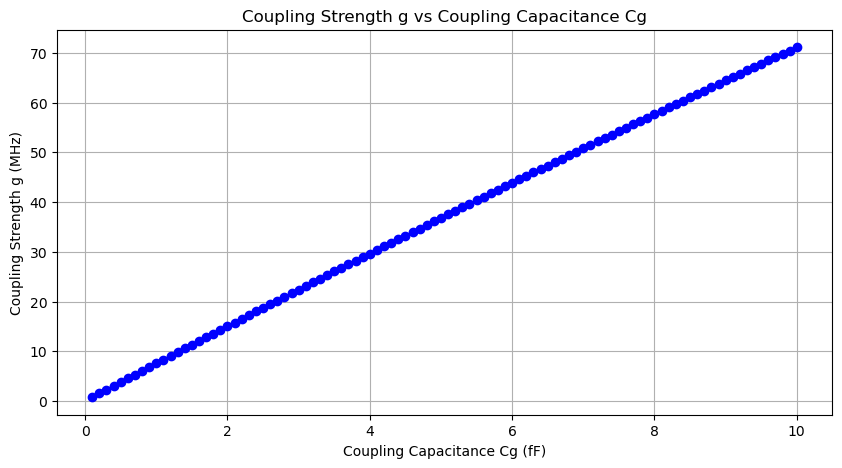

Optimal Cg: 0.60 fF
Resulting g closest to 4.193745342769396 MHz: 4.56 MHz
Kai: 0.00 MHz


In [4]:
import matplotlib.pyplot as plt


# Define the function to calculate g
def coupling_strength(Cg, Cq, Cr, omega_r):
    g= 1/2  * omega_r *Cg/np.sqrt((Cq+Cg)*(Cg+Cr))
    return g

# Define the objective function to minimize the difference from the desired g
def objective(Cg):
    return (coupling_strength(Cg[0], Cq, Cr, omega_r) - g)**2
    
Cg_values = np.linspace(0.1e-15, 10e-15, 100)  # From 0.1 fF to 10 fF

# Store g values for each Cg
g_values = np.array([coupling_strength(Cg, Cq, Cr, omega_r) for Cg in Cg_values])

# Convert g to MHz for plotting
g_values_MHz = g_values / (2 * np.pi) * 1e-6

# Plot g vs Cg
plt.figure(figsize=(10, 5))
plt.plot(Cg_values * 1e15, g_values_MHz, marker='o', linestyle='-', color='b')
plt.title('Coupling Strength g vs Coupling Capacitance Cg')
plt.xlabel('Coupling Capacitance Cg (fF)')
plt.ylabel('Coupling Strength g (MHz)')
plt.grid(True)
plt.show()

# Find the Cg value that gives the closest g to the desired value
desired_g_MHz = g/2/np.pi/1e6  # Desired g in MHz, example
index = np.argmin(np.abs(g_values_MHz - desired_g_MHz))
optimal_Cg = Cg_values[index]
optimal_g = g_values_MHz[index]
kai = optimal_g**2*1e12/Delta**2*alpha*2*np.pi *1e-6


print(f"Optimal Cg: {optimal_Cg*1e15:.2f} fF")
print(f"Resulting g closest to {desired_g_MHz} MHz: {optimal_g:.2f} MHz")
print(f"Kai: {kai:.2f} MHz")

In [5]:

def calculate_coupling_strength_and_kappa(Cg, Cq, Cr, omega_r, omega_q, alpha):
  
    g = 0.5 * omega_r * Cg / np.sqrt((Cq + Cg) * (Cr + Cg))
    Delta = omega_q - omega_r
    kappa = (g**2 * alpha) / (Delta * (Delta + alpha))
    return g, kappa

# Example Cg
Cg = 8.57e-15  # 1 fF

# Calculate g and kappa
g, kappa = calculate_coupling_strength_and_kappa(Cg, Cq, Cr, omega_r, omega_q, alpha)
g_MHz = g / (2 * np.pi) * 1e-6  # Convert from radians/s to MHz
kappa_MHz = kappa / (2 * np.pi) * 1e-6  # Convert from radians/s to MHz

print(f"The coupling strength g for Cg = {Cg} F is approximately {g_MHz:.2f} MHz.")
print(f"The dispersive shift kappa for Cg = {Cg} F is approximately {kappa_MHz:.2f} MHz.")


The coupling strength g for Cg = 8.57e-15 F is approximately 61.53 MHz.
The dispersive shift kappa for Cg = 8.57e-15 F is approximately 0.38 MHz.
